In [18]:
from google.colab import files
uploaded = files.upload()


Saving heart_dataset.csv to heart_dataset.csv


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [20]:
df = pd.read_csv("heart_dataset.csv")
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,67,1,0,162,232,1,1,177,0,1.6,1,1
1,57,1,1,141,352,1,0,138,0,0.1,0,1
2,43,1,0,111,136,1,1,108,0,3.5,2,1
3,71,1,0,109,223,1,1,178,1,5.1,2,1
4,36,0,0,108,342,0,1,174,0,3.3,1,1


In [21]:
print("Dataset Shape:", df.shape)
df.info()
df.describe()
df["HeartDisease"].value_counts()


Dataset Shape: (500, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             500 non-null    int64  
 1   Sex             500 non-null    int64  
 2   ChestPainType   500 non-null    int64  
 3   RestingBP       500 non-null    int64  
 4   Cholesterol     500 non-null    int64  
 5   FastingBS       500 non-null    int64  
 6   RestingECG      500 non-null    int64  
 7   MaxHR           500 non-null    int64  
 8   ExerciseAngina  500 non-null    int64  
 9   Oldpeak         500 non-null    float64
 10  ST_Slope        500 non-null    int64  
 11  HeartDisease    500 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 47.0 KB


,count
HeartDisease,
0,259
1,241


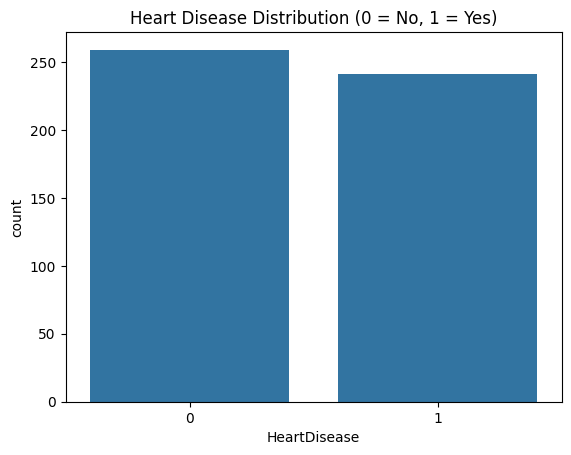

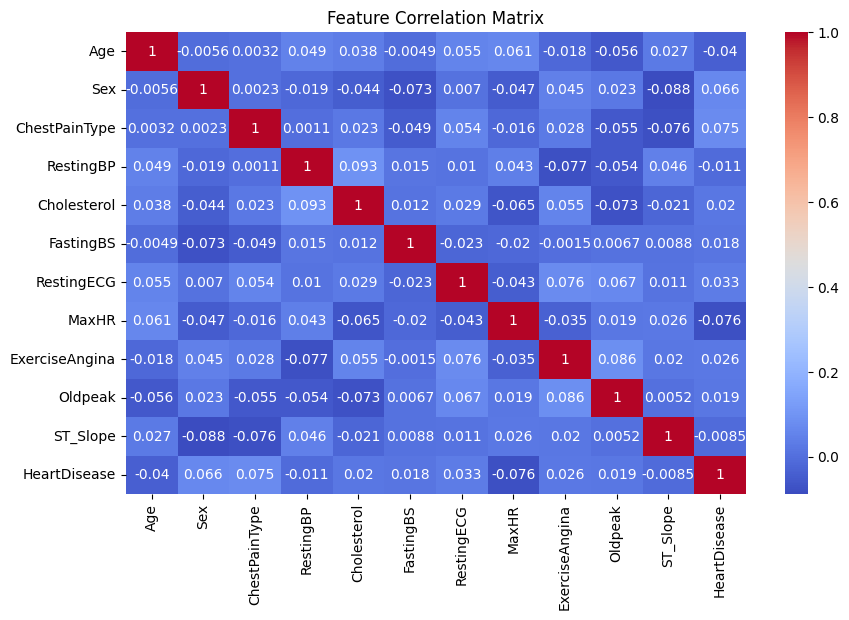

In [22]:
sns.countplot(x='HeartDisease', data=df)
plt.title("Heart Disease Distribution (0 = No, 1 = Yes)")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


In [23]:
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [24]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [25]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.47

Classification Report:

              precision    recall  f1-score   support

           0       0.51      0.50      0.50        54
           1       0.43      0.43      0.43        46

    accuracy                           0.47       100
   macro avg       0.47      0.47      0.47       100
weighted avg       0.47      0.47      0.47       100



In [26]:

sample = X_test.iloc[[0]]
print("Sample Input:\n", sample)
print("Predicted (0=No disease, 1=Disease):", model.predict(sample))


Sample Input:
      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
361   61    0              3        104          356          1           2   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
361    158               0      2.3         0  
Predicted (0=No disease, 1=Disease): [1]


In [27]:
import joblib
joblib.dump(model, "heart_disease_model.pkl")


['heart_disease_model.pkl']